<a href="https://colab.research.google.com/github/dimasw09/BelajarKoding/blob/main/PrediksiKelulusan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


dataset_url = ('https://raw.githubusercontent.com/dimasw09/BelajarKoding/main/Dataset1.csv')

d = pd.read_csv(dataset_url)
d.head(170)

,Tahun Masuk,IPK,SKS,Status Kelulusan
0,2015,4,103,1
1,2015,3,103,1
2,2015,3,98,0
3,2015,3,101,1
4,2015,3,101,0
...,...,...,...,...
165,2016,3,8,1
166,2016,3,72,1
167,2016,3,112,1
168,2017,3,84,1


In [2]:
d.columns

Index(['Tahun Masuk', 'IPK', 'SKS', 'Status Kelulusan'], dtype='object')

In [3]:
x=d.iloc[:,0:-1]
y=d.iloc[:,2].values
print(x.shape)

(170, 3)


In [4]:
#Import Module
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(x, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
test_X = sc.fit_transform(test_X)
test_y = sc.fit_transform(test_y.reshape(-1,1))
# print(test_X)
# print(test_y)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=5,activation='relu'))
model.add(tf.keras.layers.Dense(units=4,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(test_X,test_y.reshape(-1,1),epochs=100,batch_size=30)

# model.summary()

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 0.8447
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 0.8422
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8399
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8375
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8356
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 0.8331
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 0.8308
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8288
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8266
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8245
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8225
Epoch 12/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8204
Epoch 13/100
2/2 [==============================] - 0s 8ms/s

In [9]:
ypredict=model.predict(test_X)
# print(ypredict)

2/2 [==============================] - 0s 5ms/step


In [10]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ypredict,test_y)
print(mae)

0.7023990220686435


<Figure size 432x288 with 0 Axes>

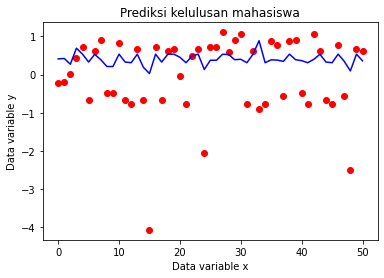

<Figure size 432x288 with 0 Axes>

In [11]:
a=range(len(test_X))
plt.scatter(a,test_y, color='red')
plt.plot(a,ypredict, color='blue')
plt.title('Prediksi kelulusan mahasiswa')
plt.xlabel('Data variable x')
plt.ylabel('Data variable y')
# plt.plot(x,ypredict)
plt.figure()